In [1]:
# Navigate to appropriate directory
import os
while os.path.split(os.getcwd())[1] != "patchmatch":
    os.chdir("..")
    if os.getcwd() == "/":
        raise ValueError()

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from PIL import Image
from time import time
from tqdm import tqdm

import patchmatch as pm

In [2]:
RES_DIR = "results/results5/"

class Result:
    def __init__(self, filename):
        title = filename[:10]
        im = Image.open(f"data/CMFD_DB/{title}_copy.png")
        self.im = np.array(im)
        gt = Image.open(f"data/CMFD_DB/{title}_gt.png")
        self.gt = np.array(gt) > 0
        a = np.load(RES_DIR + title + "_results.npz")
        for key in a.files:
            setattr(self, key, a[key])
    
    def print_res(self):
        im, gt = self.im, self.gt
        # Show im and gt
        fig, ax = plt.subplots(1, 2, figsize=(15, 8))
        ax[0].imshow(im)
        ax[1].imshow(gt, cmap="gray")
        plt.show()
        
        return self

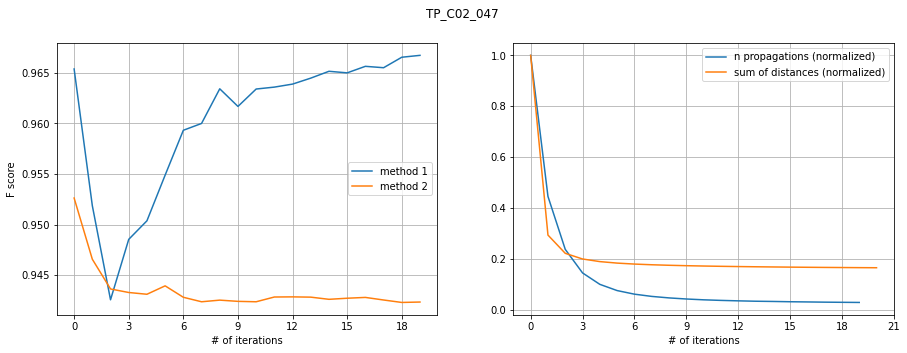

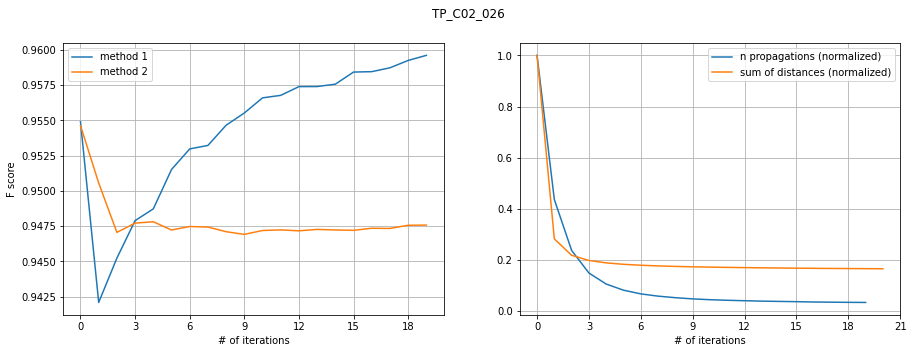

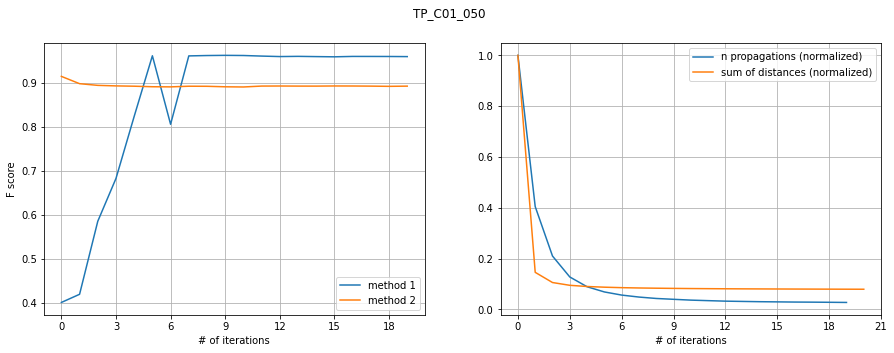

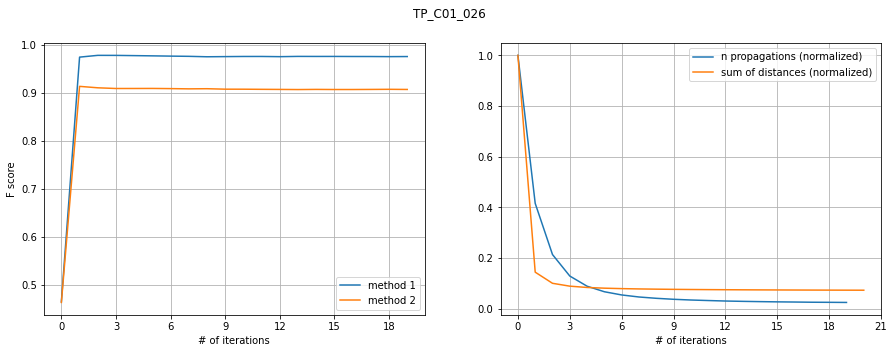

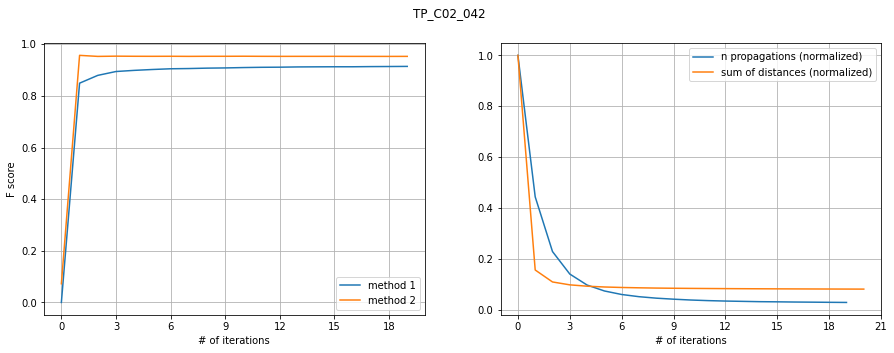

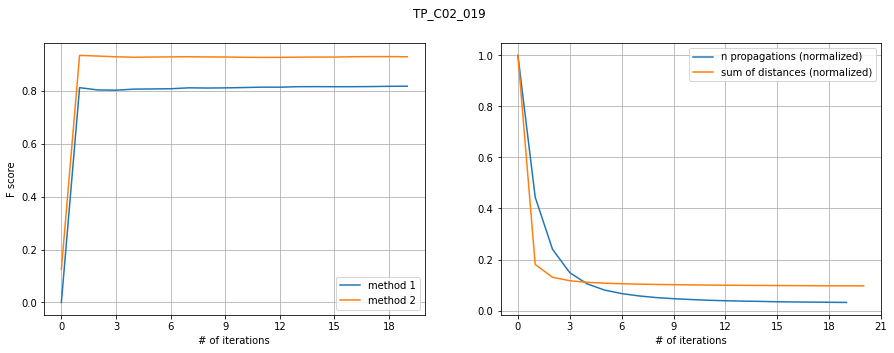

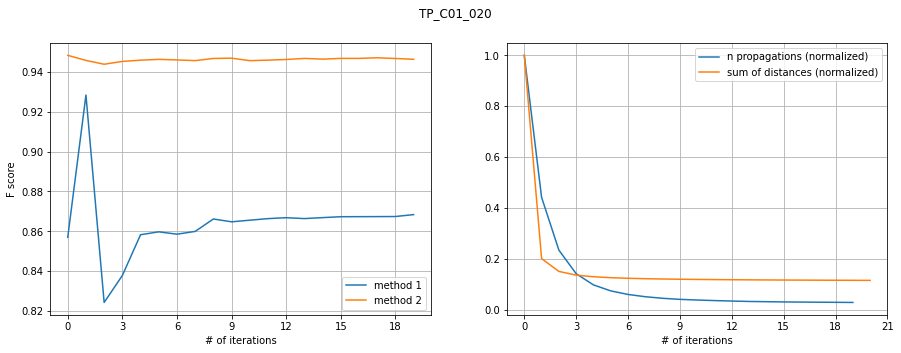

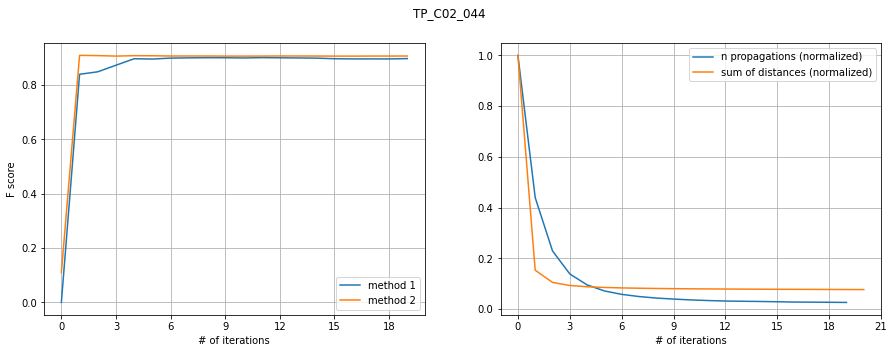

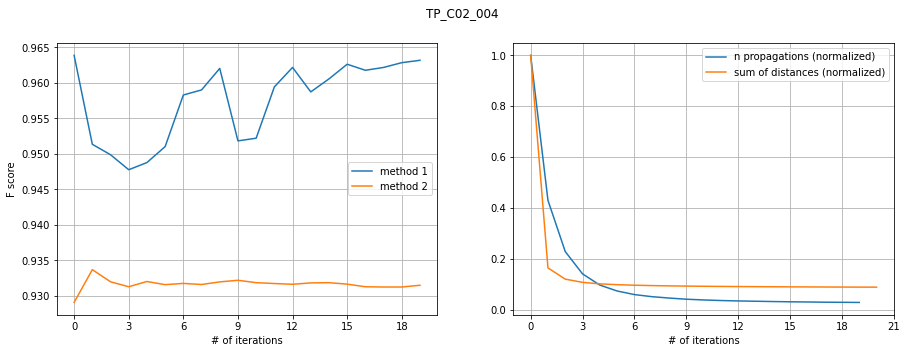

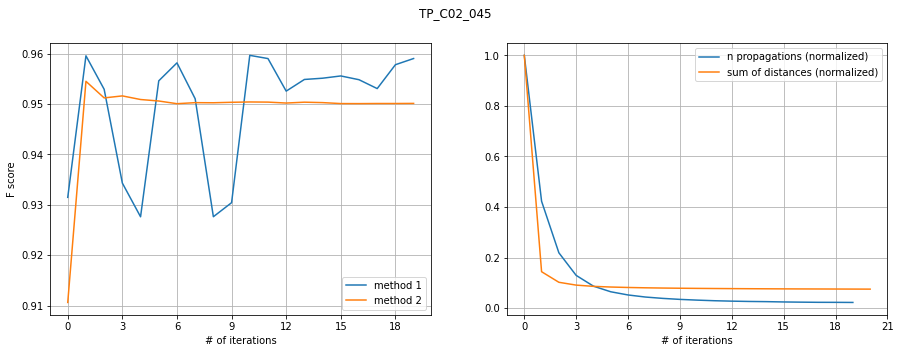

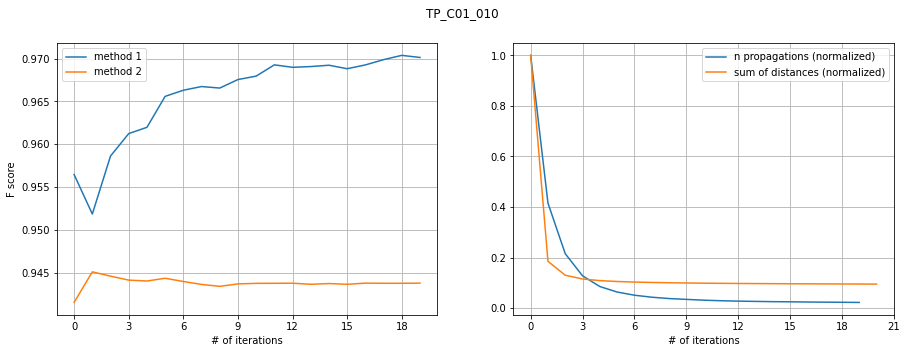

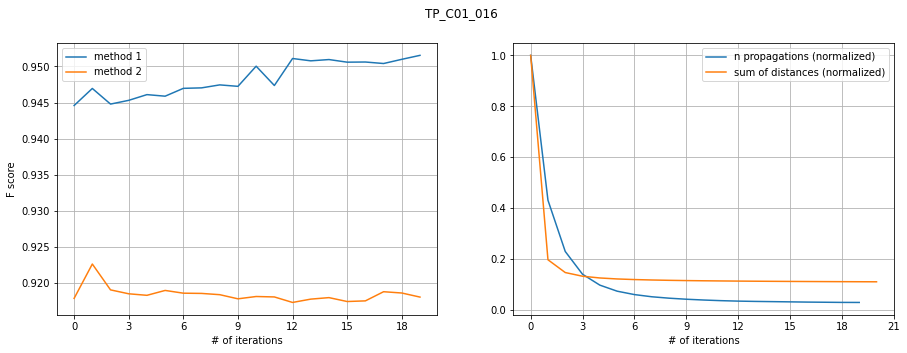

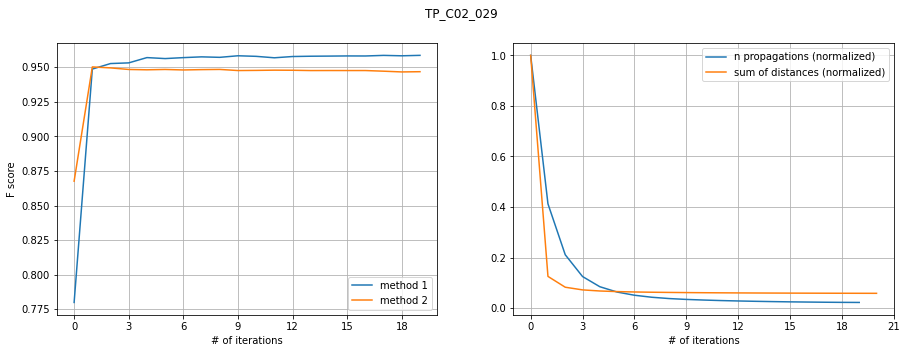

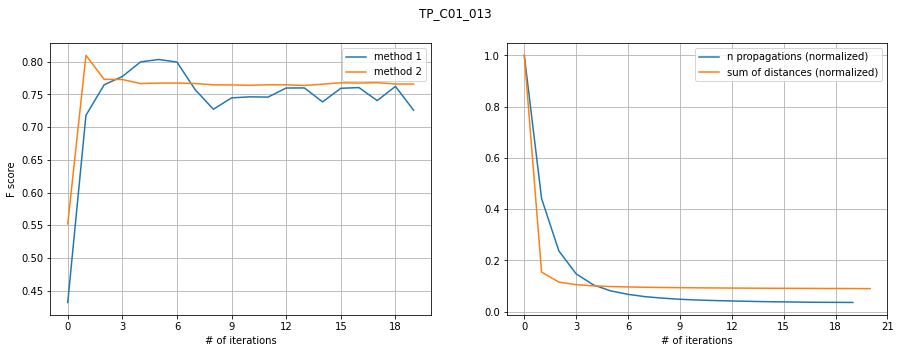

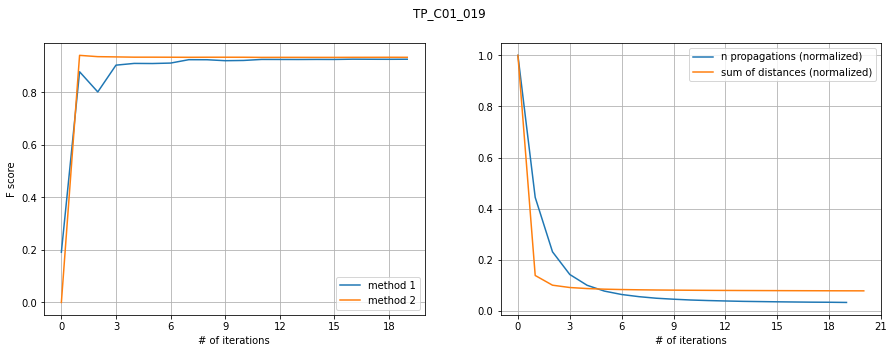

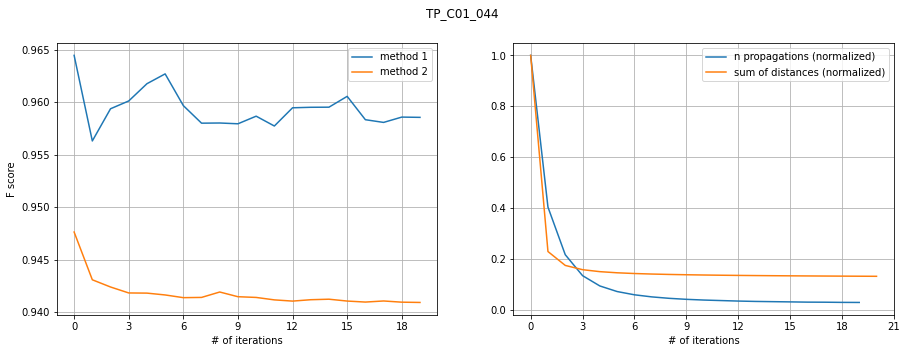

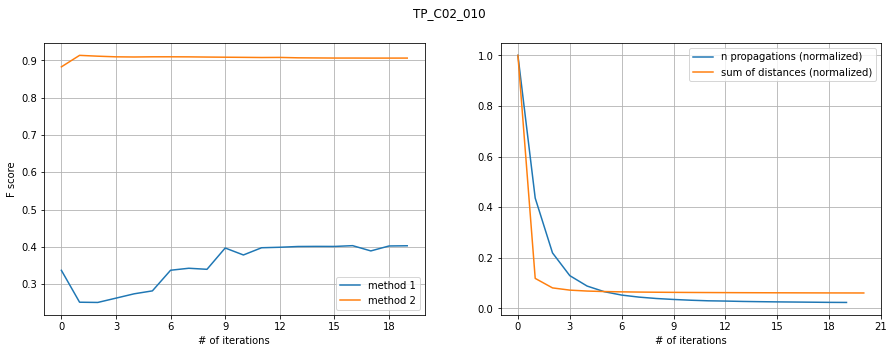

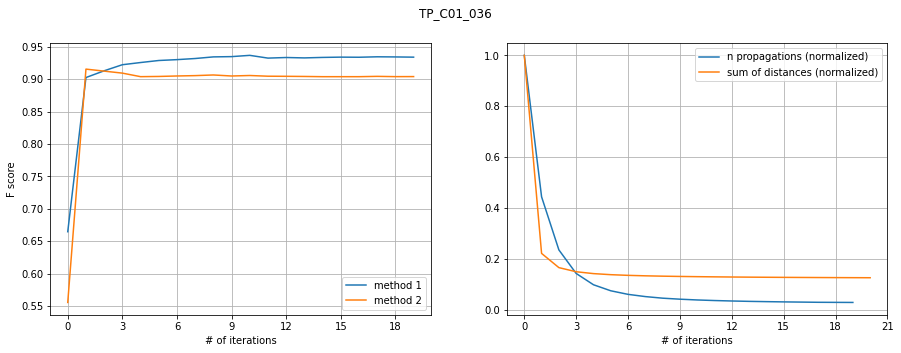

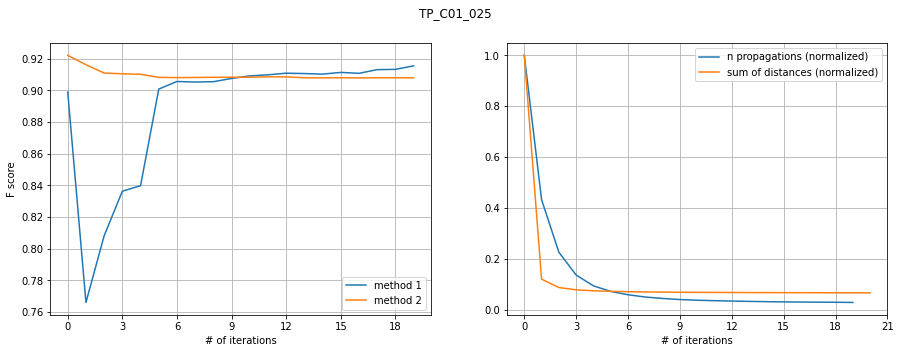

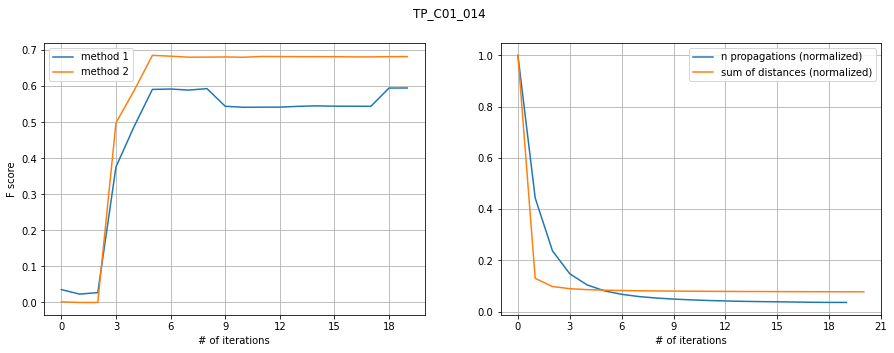

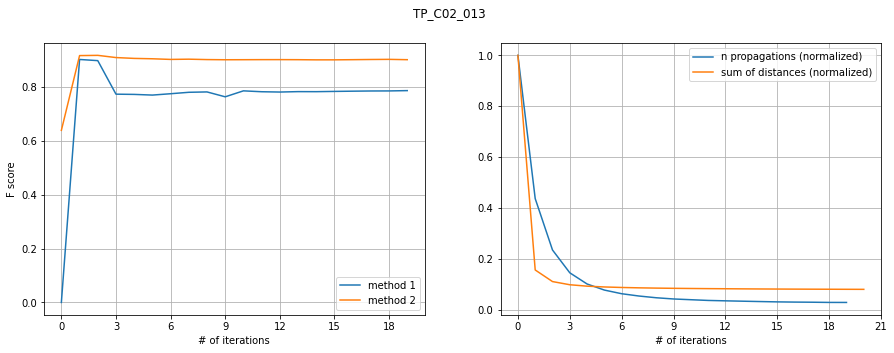

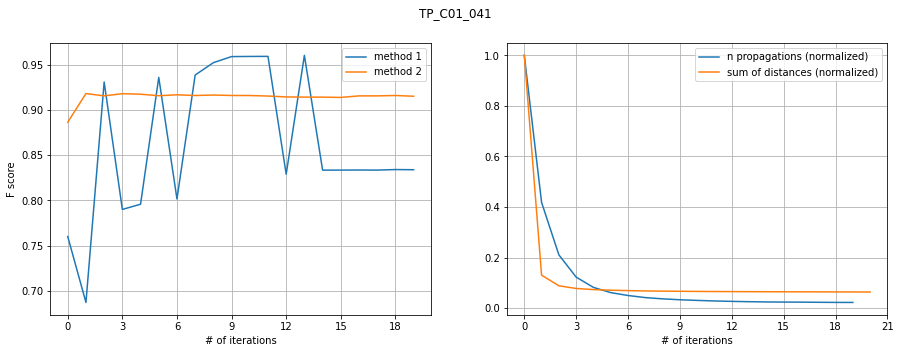

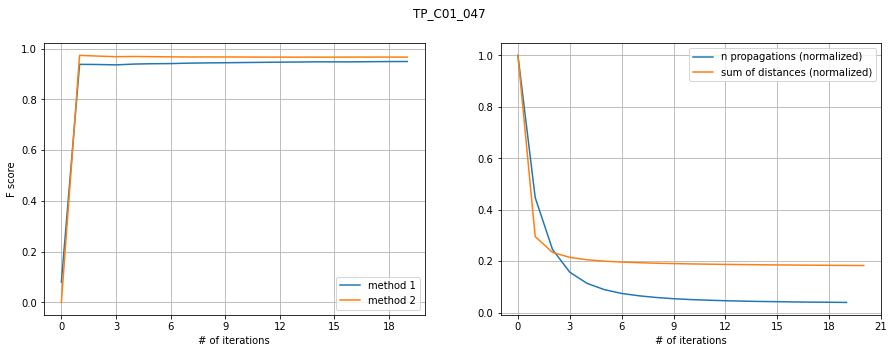

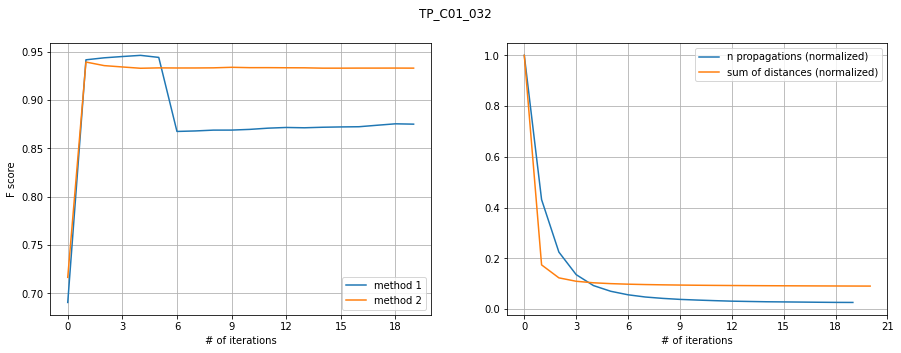

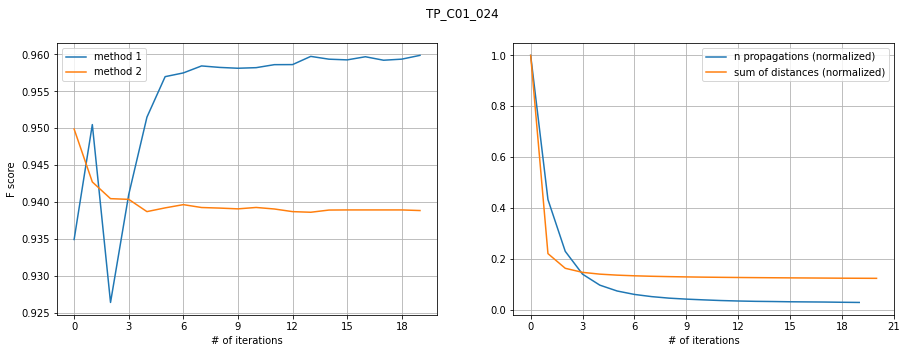

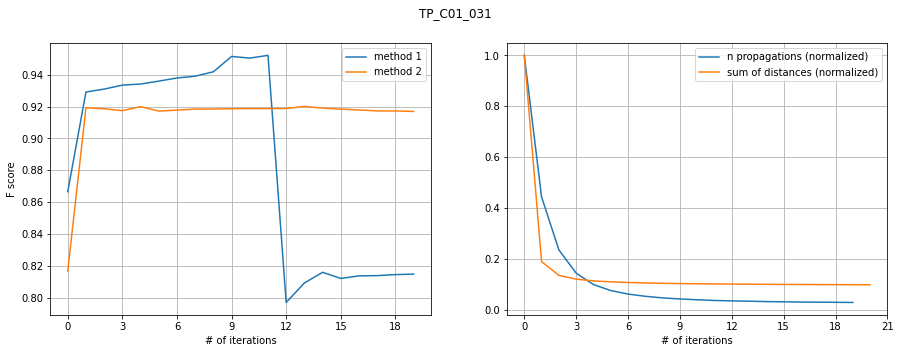

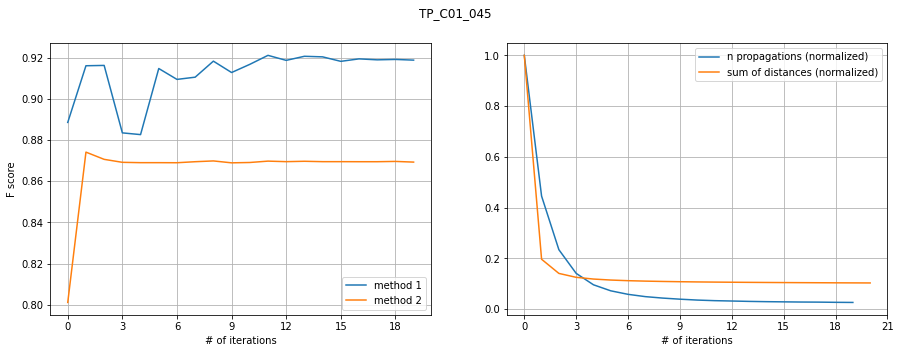

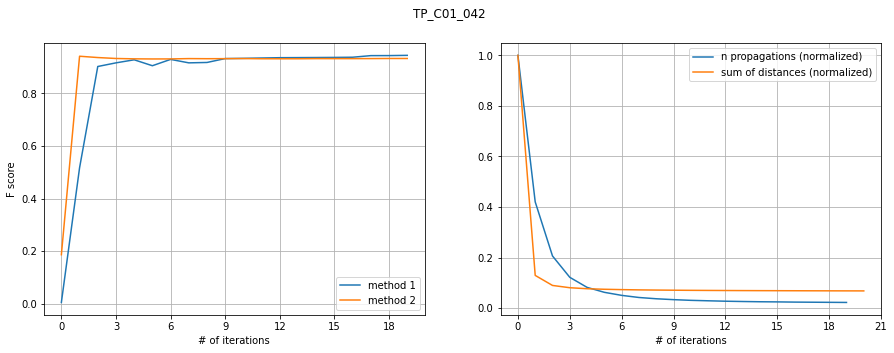

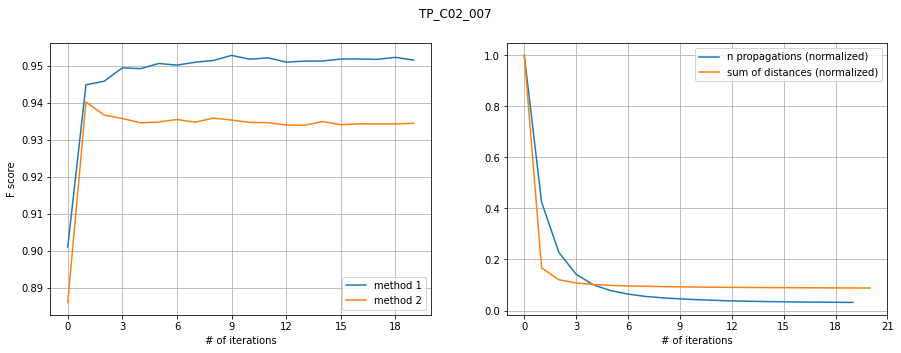

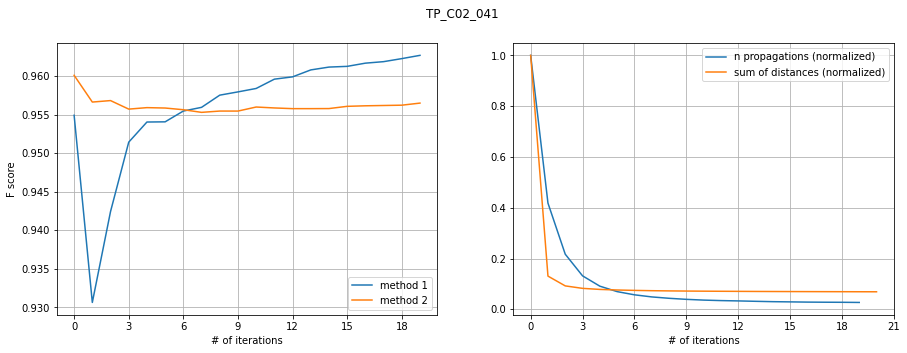

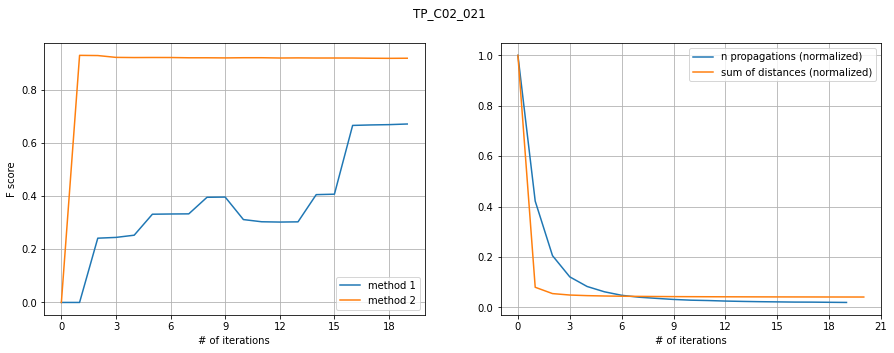

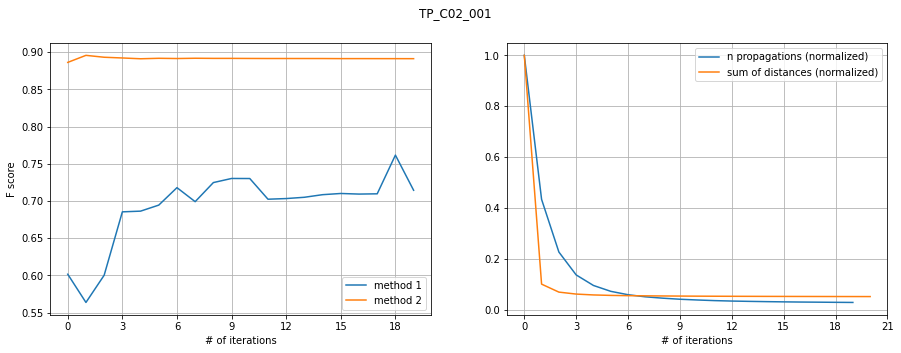

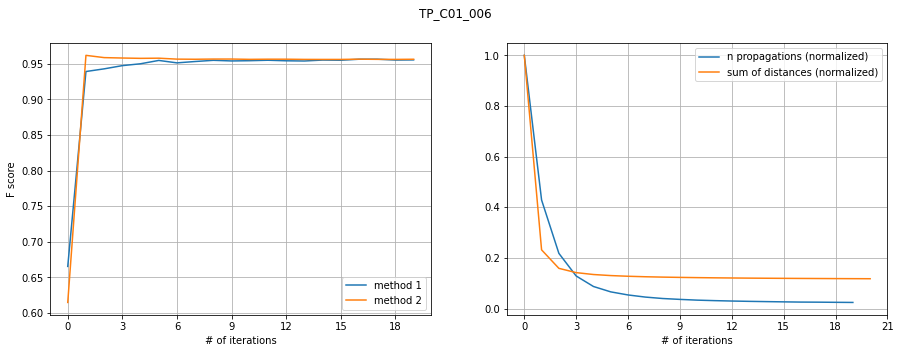

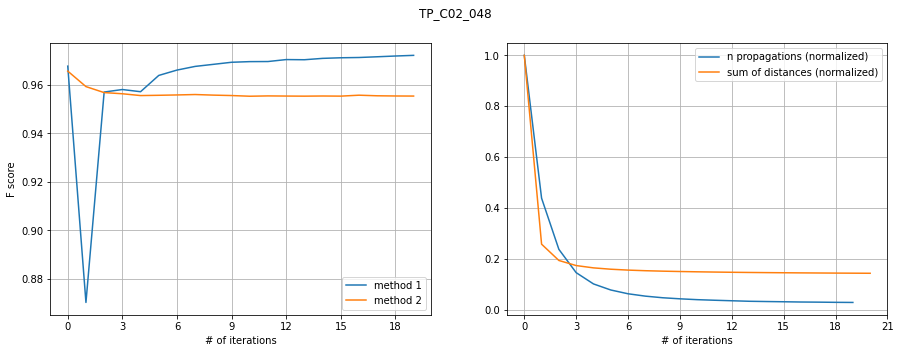

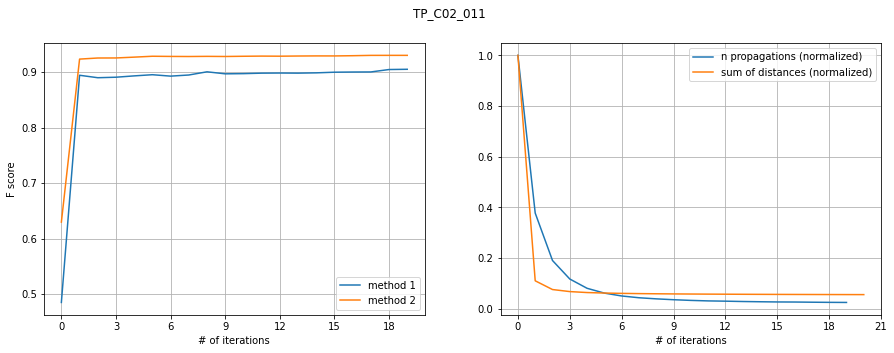

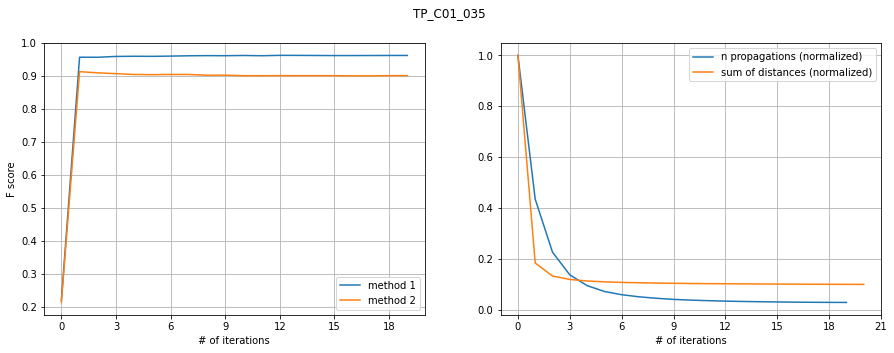

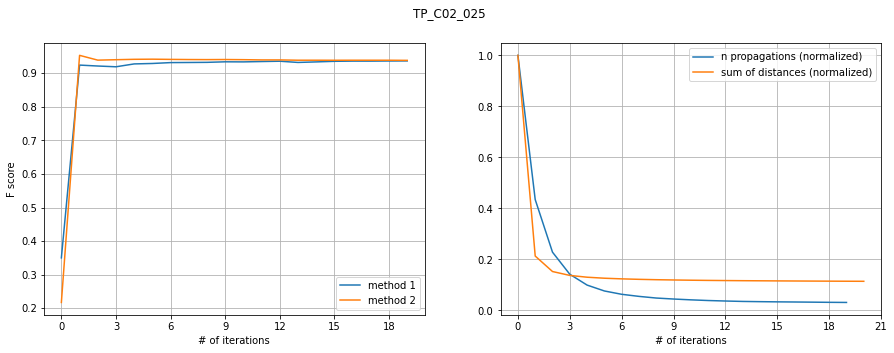

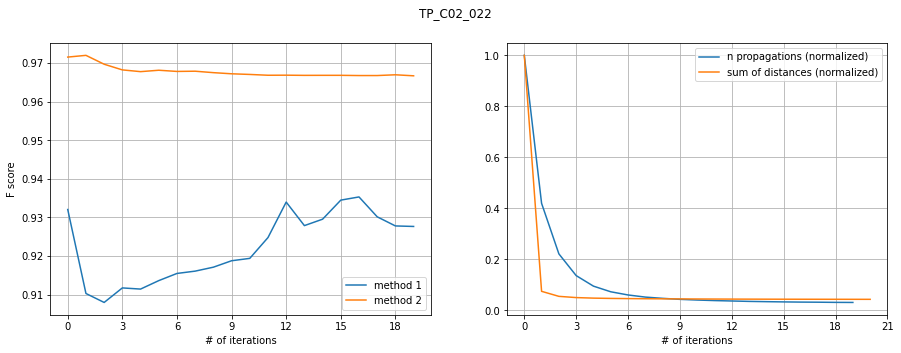

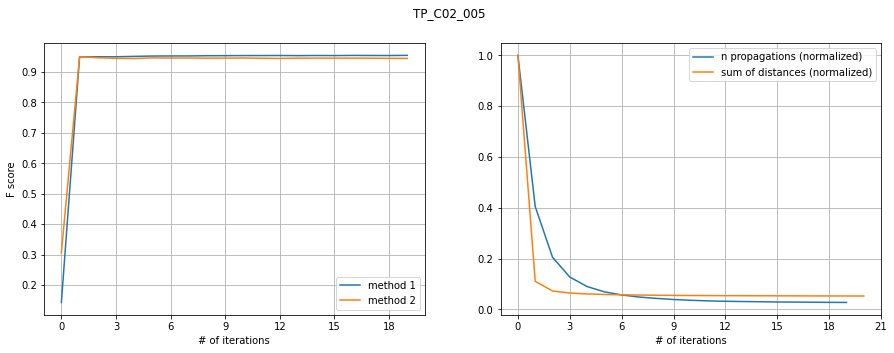

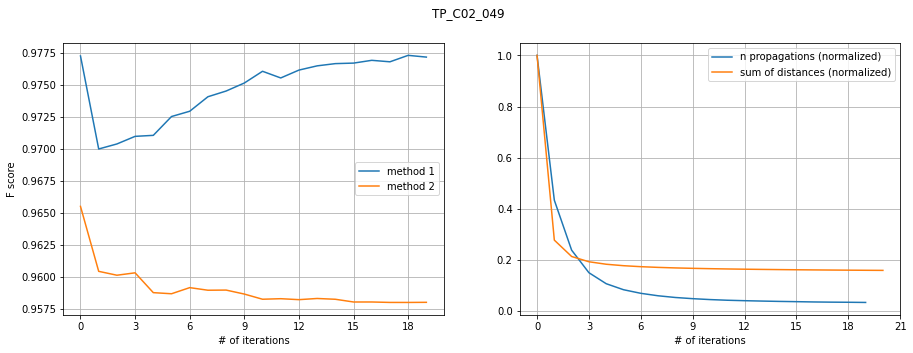

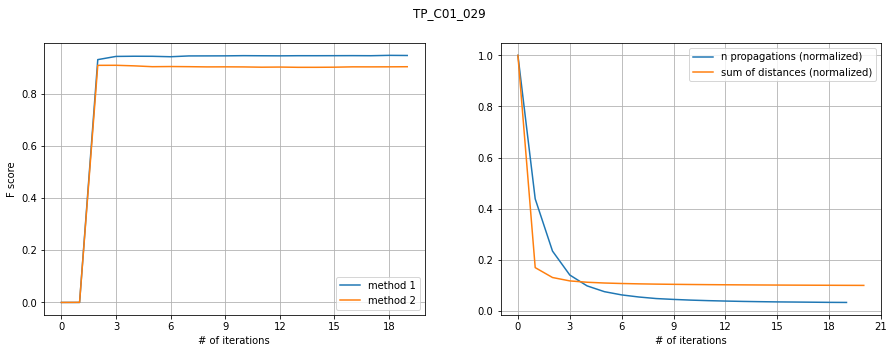

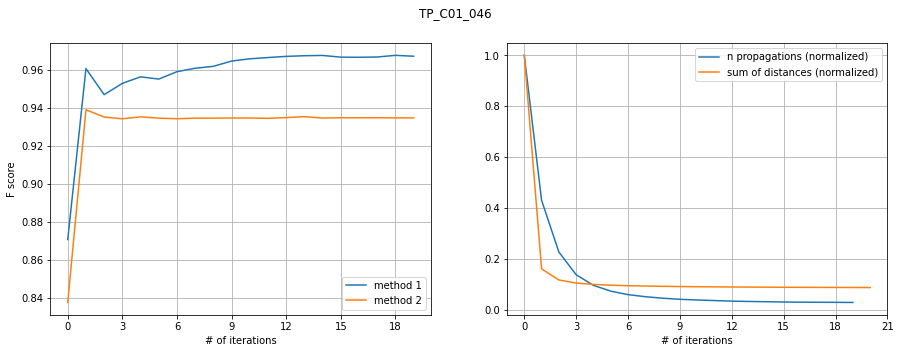

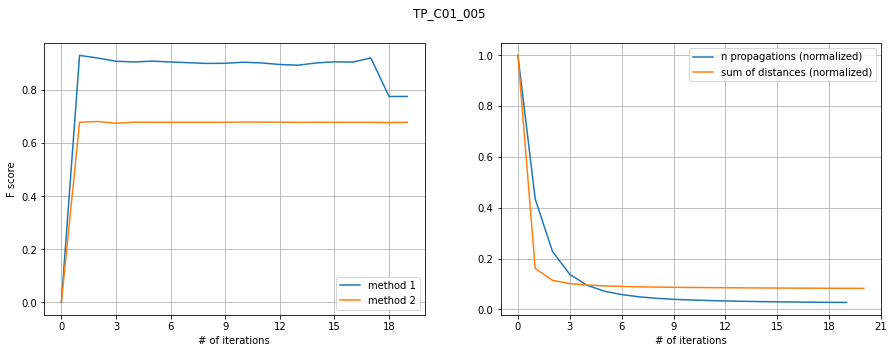

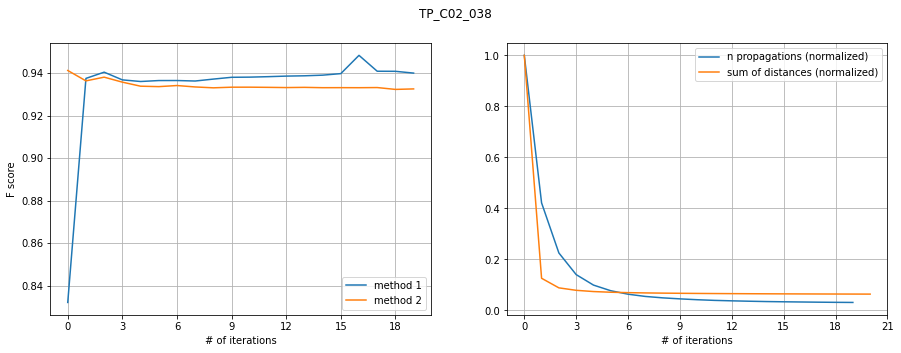

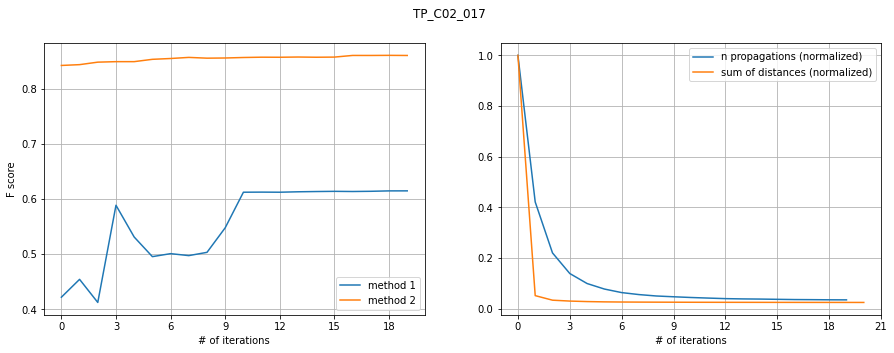

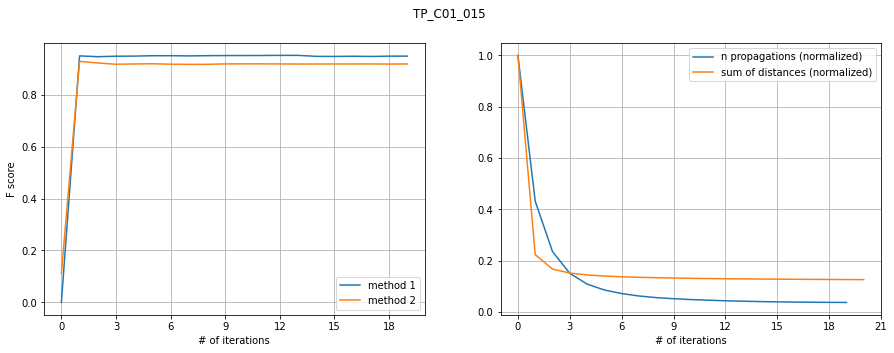

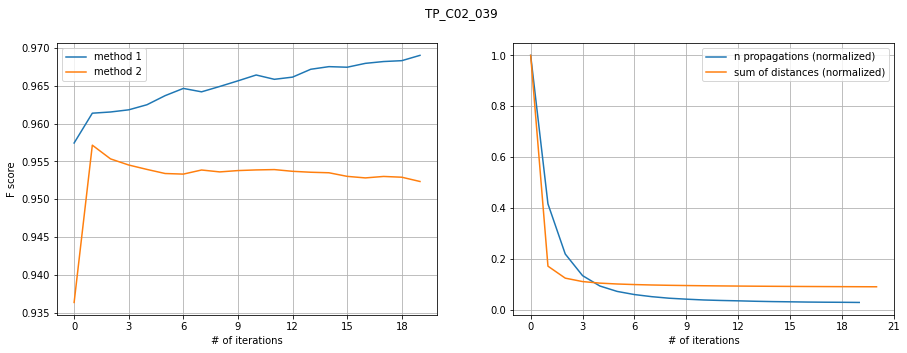

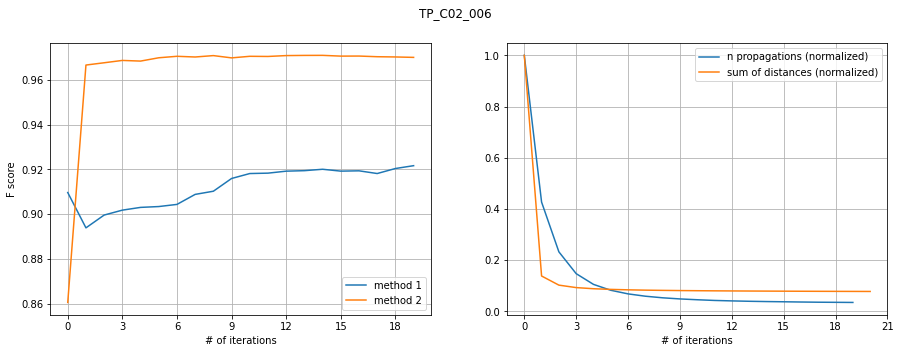

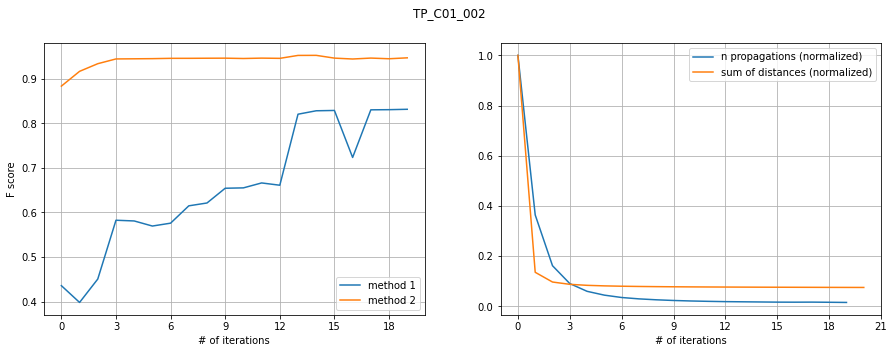

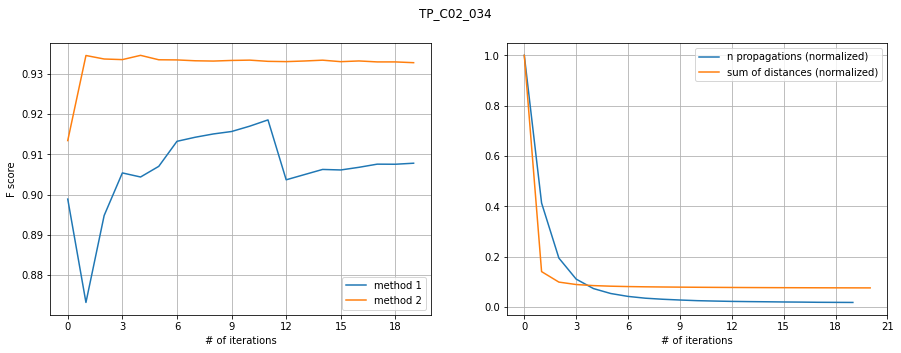

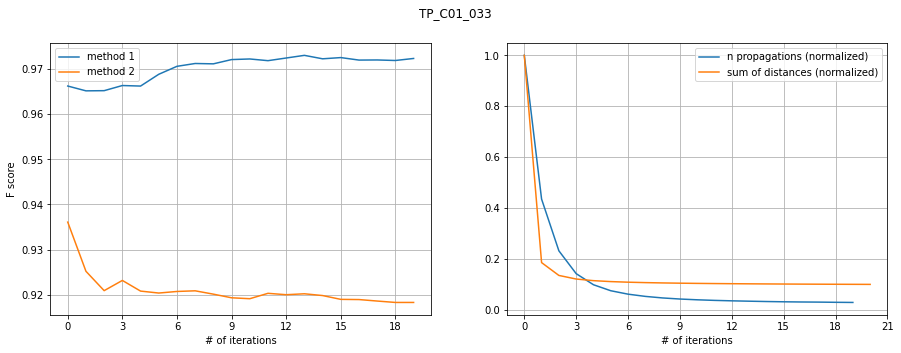

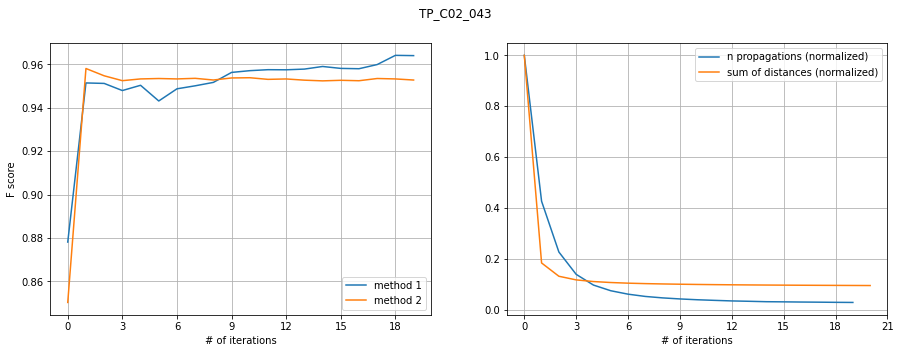

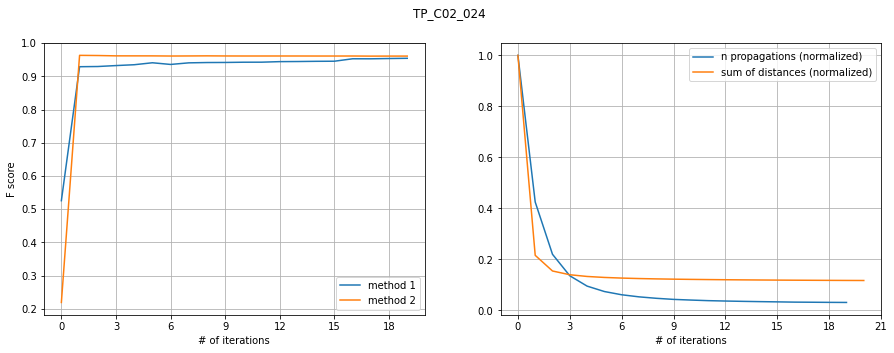

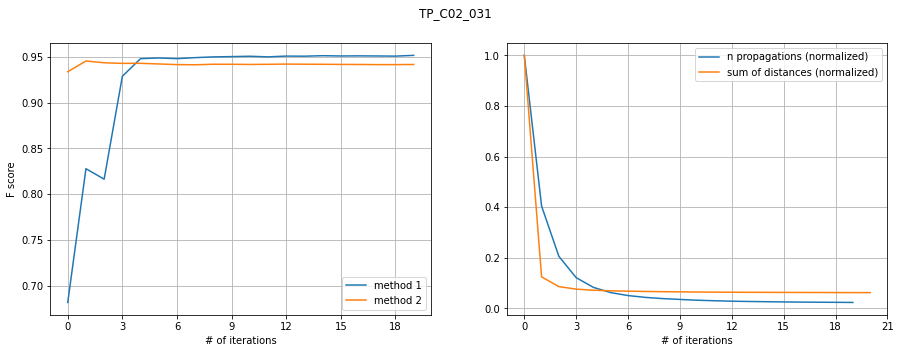

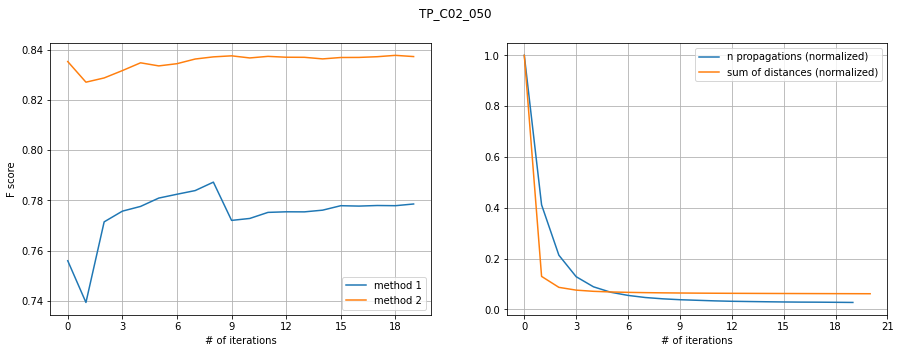

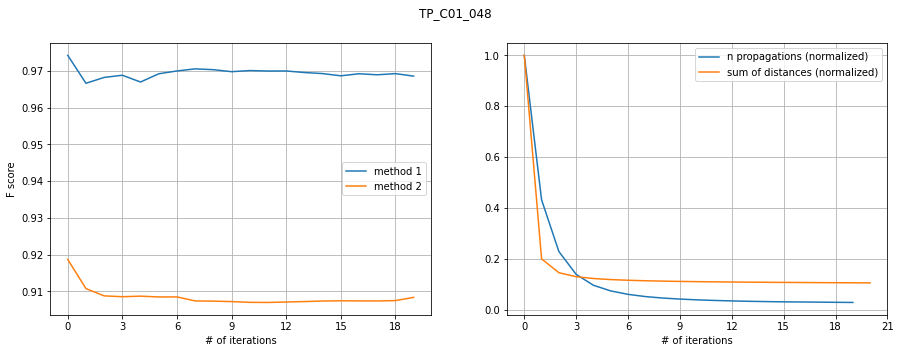

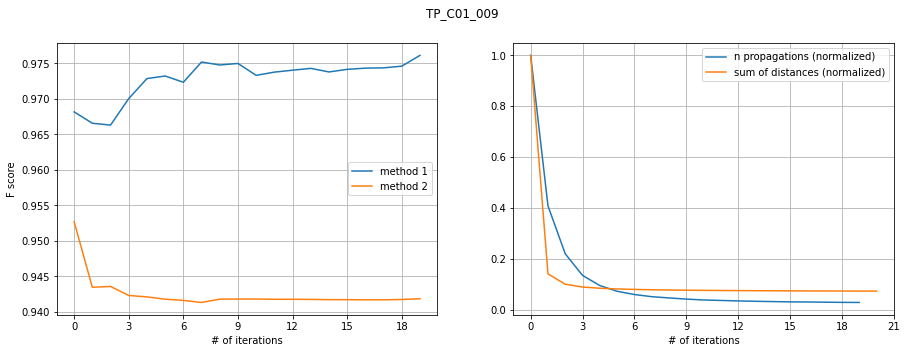

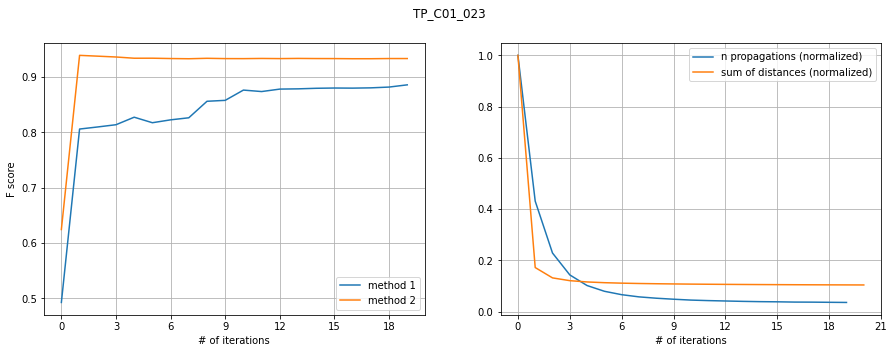

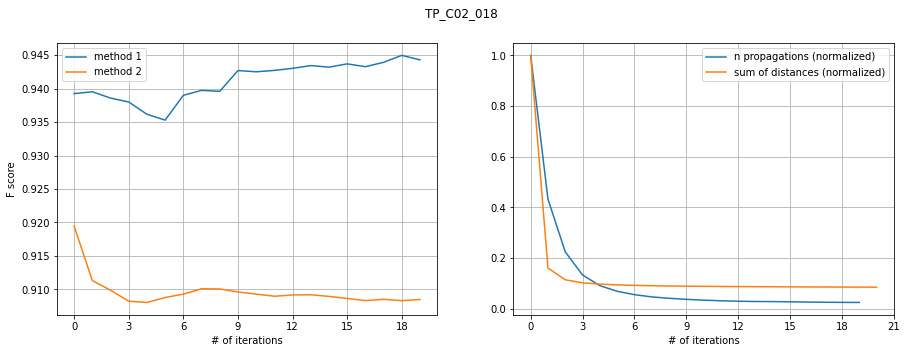

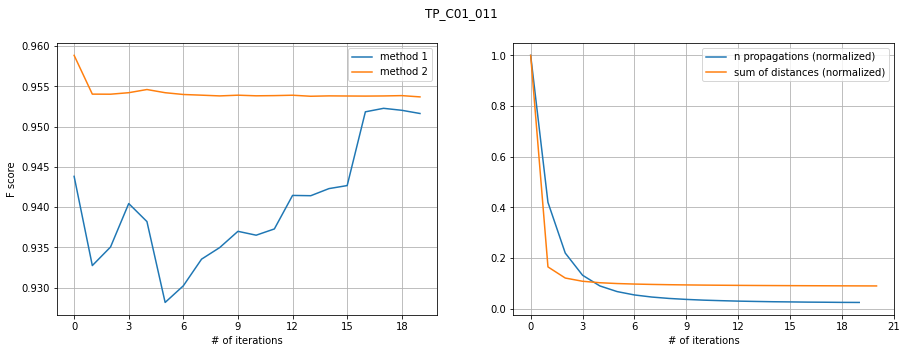

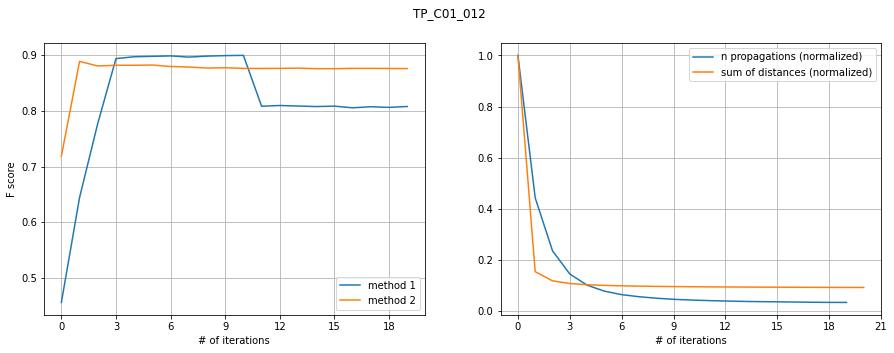

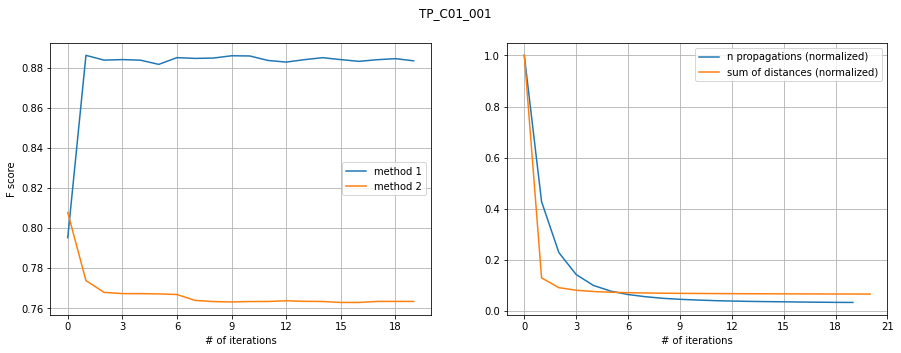

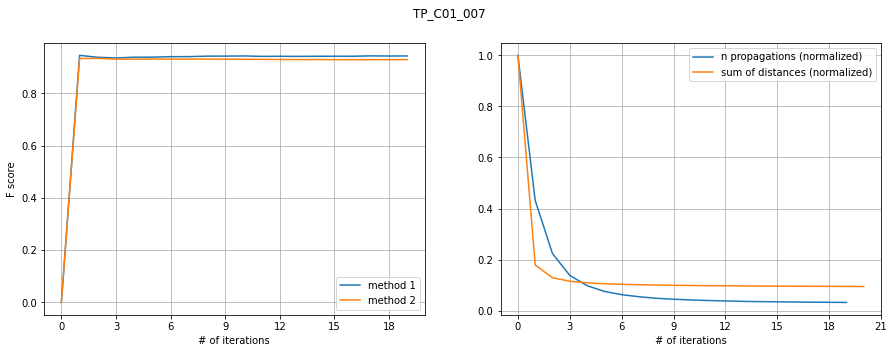

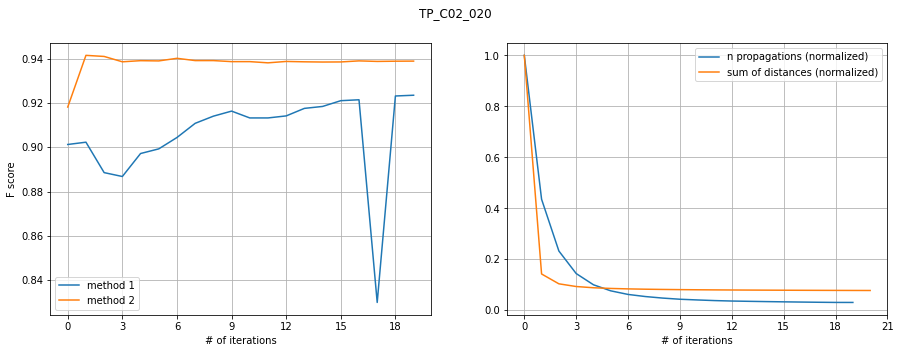

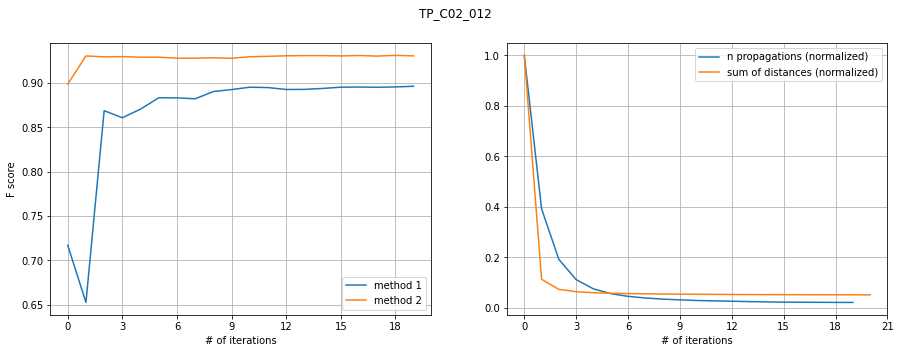

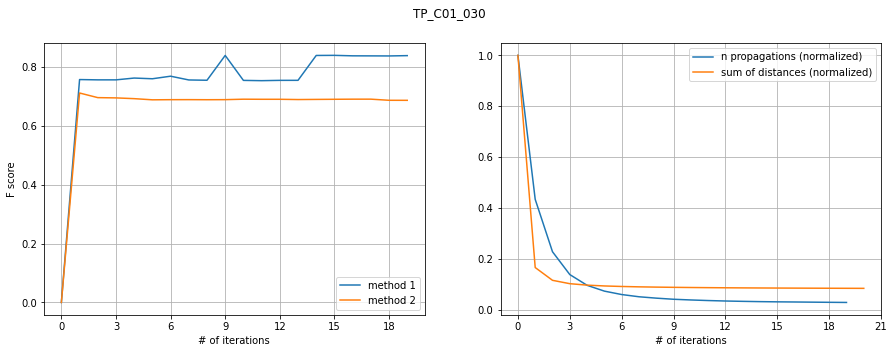

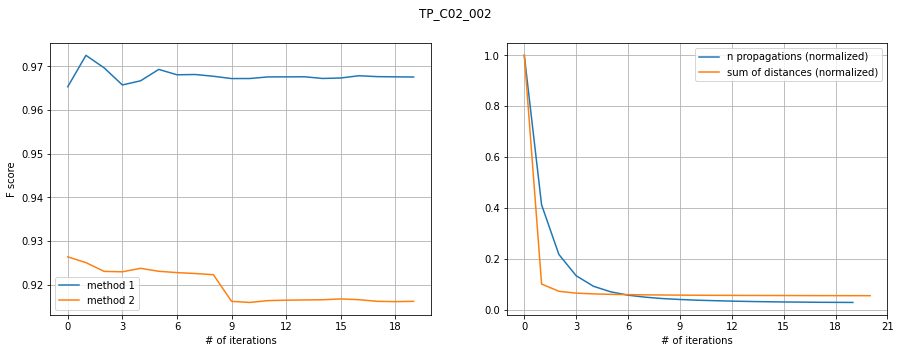

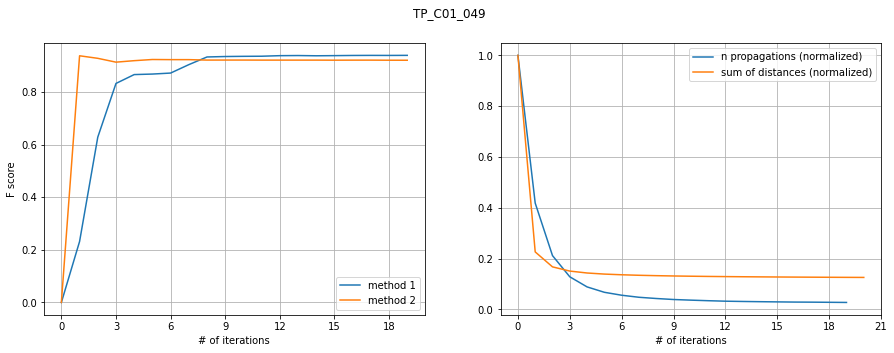

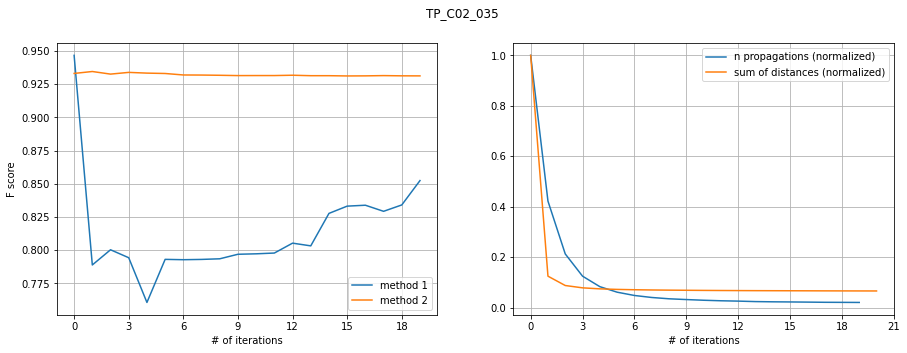

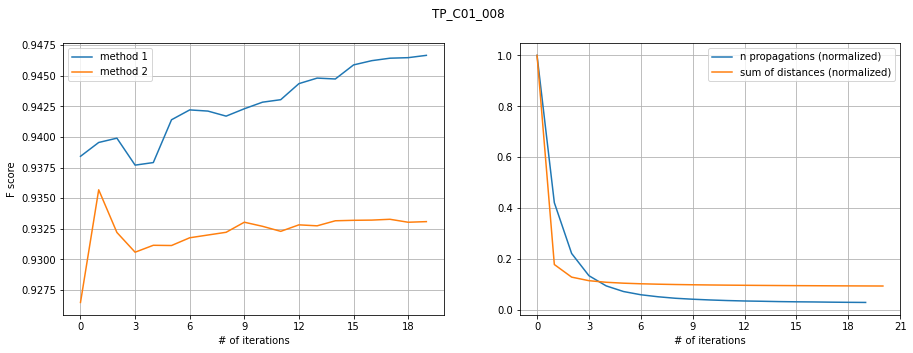

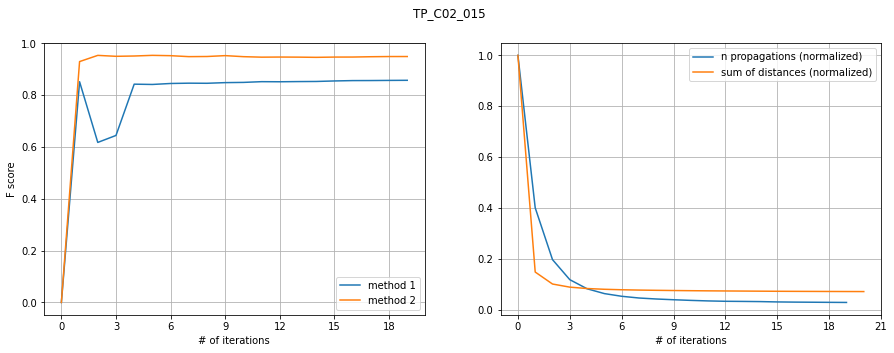

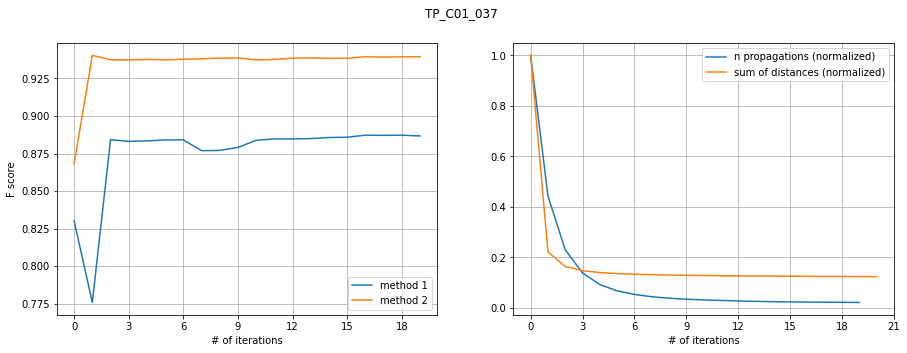

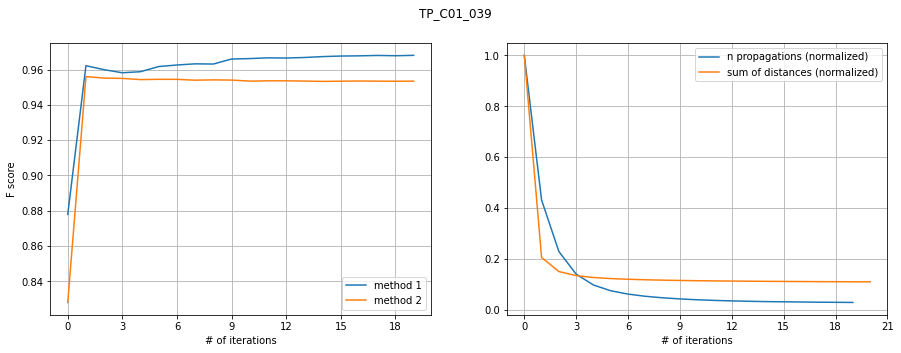

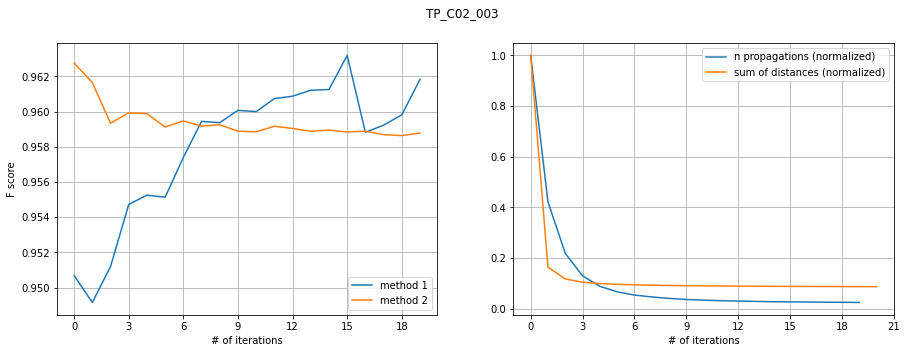

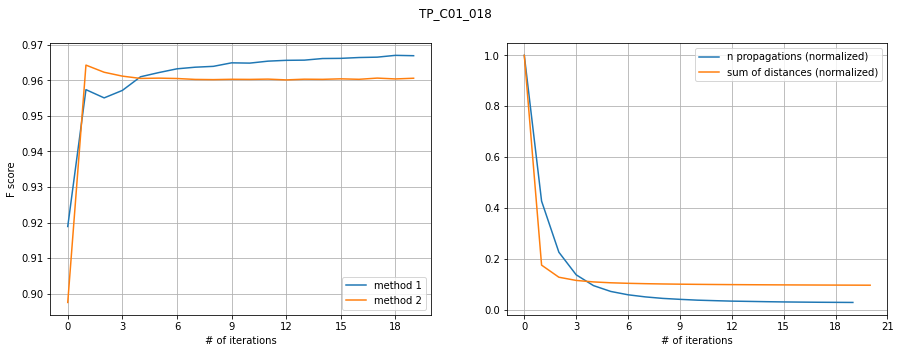

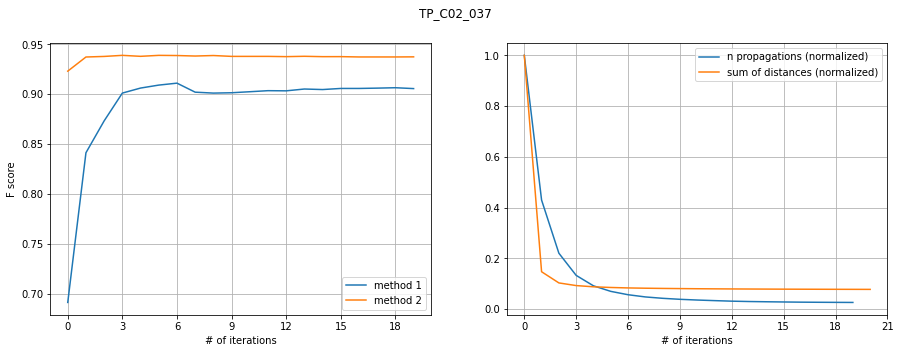

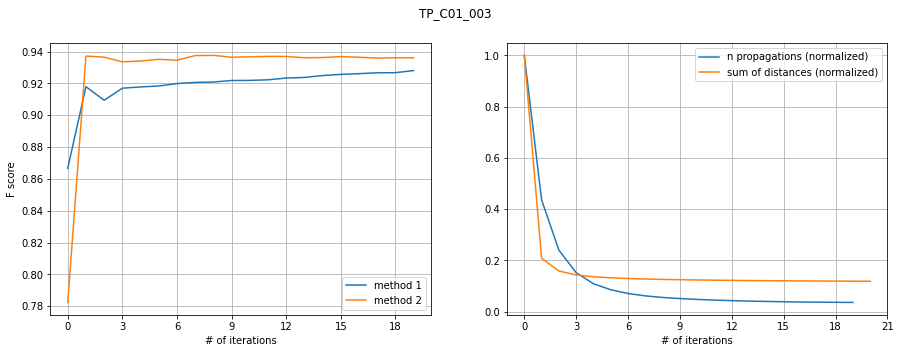

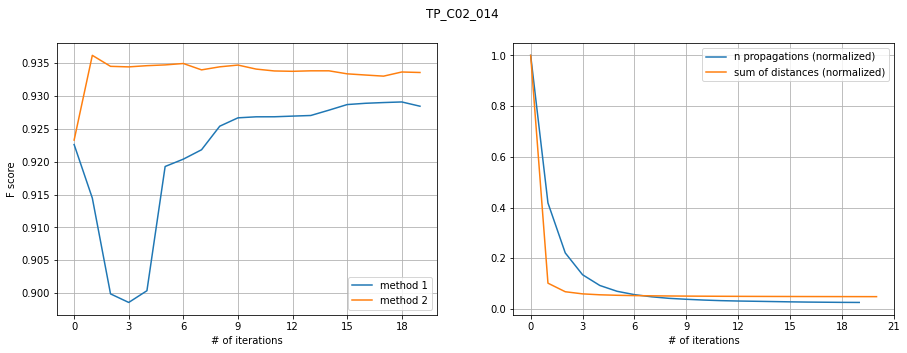

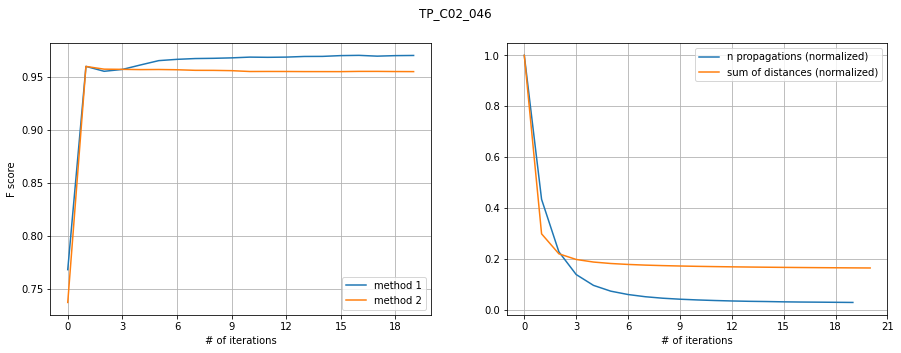

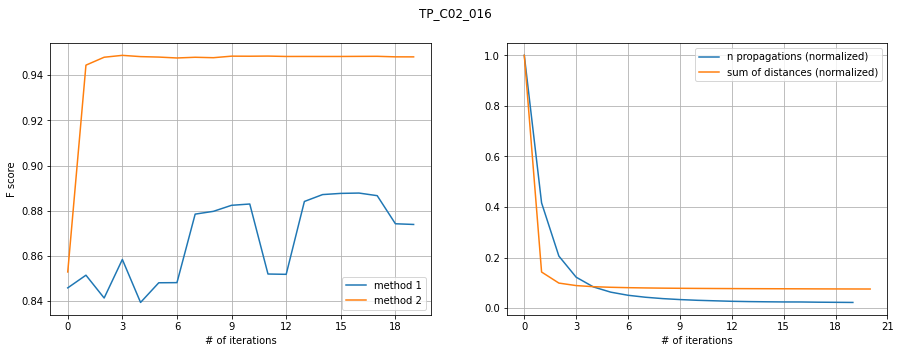

In [3]:
filenames = [f for f in os.listdir(RES_DIR) if f[:2] == "TP"]

for filename in filenames:
    res = Result(filename)
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    plt.suptitle(filename[:10])
    # ax[0]
    ax[0].plot(res.fscores1, label="method 1")
    ax[0].plot(res.fscores2, label="method 2")
    ax[0].legend()
    ax[0].grid()
    ax[0].set_xlabel("# of iterations")
    ax[0].set_ylabel("F score")
    ax[0].xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax[1]
    ax[1].plot(res.n_propagations / res.n_propagations[0], label="n propagations (normalized)")
    ax[1].plot(res.sum_of_distances / res.sum_of_distances[0], label="sum of distances (normalized)")
    ax[1].legend()
    ax[1].grid()
    ax[1].set_xlabel("# of iterations")
    ax[1].xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()

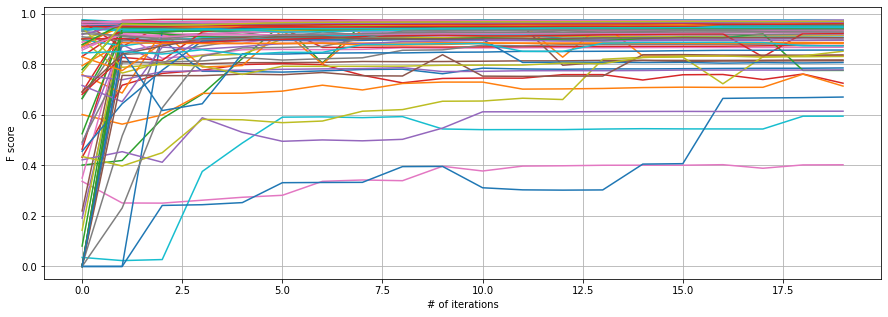

In [4]:
fscores = []

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for filename in filenames:
    res = Result(filename)
    # ax[0]
    ax.plot(res.fscores1)
# ax.legend()
ax.grid()
ax.set_xlabel("# of iterations")
ax.set_ylabel("F score")    
plt.show()

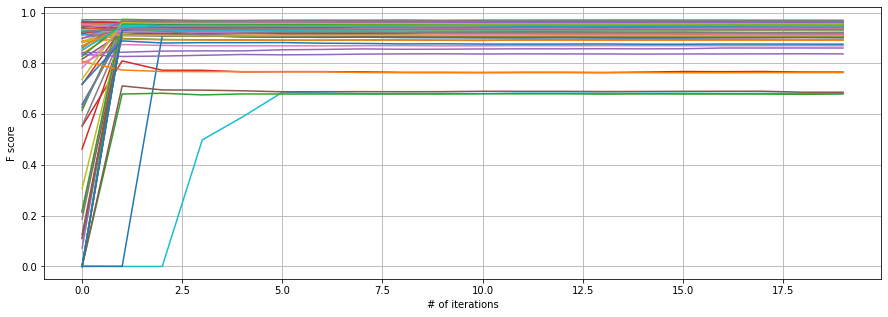

In [5]:
fscores = []

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
for filename in filenames:
    res = Result(filename)
    # ax[0]
    ax.plot(res.fscores2)
# ax.legend()
ax.grid()
ax.set_xlabel("# of iterations")
ax.set_ylabel("F score")    
plt.show()

In [6]:
fscores1 = []
fscores2 = []

for filename in filenames:
    res = Result(filename)
    fscores1.append(res.fscores1)
    fscores2.append(res.fscores2)

fscores1 = np.array(fscores1)
fscores2 = np.array(fscores2)

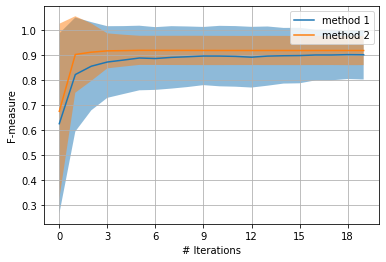

In [7]:
start = 0
niter  =         np.arange(20)[start:]
mean   = fscores1.mean(axis=0)[start:]
std    =  fscores1.std(axis=0)[start:]
mean2  = fscores2.mean(axis=0)[start:]
std2   =  fscores2.std(axis=0)[start:]
fig, ax = plt.subplots(1, 1)
ax.plot(niter, mean, label="method 1")
ax.fill_between(niter, mean-std, mean+std, alpha=0.5)
ax.plot(niter, mean2, label="method 2")
ax.fill_between(niter, mean2-std2, mean2+std2, alpha=0.5)
ax.grid()
ax.set_xlabel("# Iterations")
ax.set_ylabel("F-measure")
ax.legend()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("figures/fscore_evolution.png",bbox_inches='tight',dpi=100)
plt.show()

In [8]:
print(mean[9], 2 * std[9] / np.sqrt(80))
print(mean2[9], 2 * std2[9] / np.sqrt(80))

0.8950643440919333 0.02596156854266368
0.917337941584138 0.01307262663649369
